In [36]:
#!pip install nltk

    100% |████████████████████████████████| 1.2MB 513kB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/18/9c/1f/276bc3f421614062468cb1c9d695e6086d0c73d67ea363c501
Successfully built nltk


## EDA ON EG TWEETS

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
pd.options.display.max_colwidth = 75

In [3]:
pwd

'/home/jovyan/capstone-34/34.210.104.115/eda'

In [13]:
cd eg_twitter_pickled/

stream_أزاي.p  stream_ازيك.p  stream_كوباية.p


In [15]:
ls

stream_أزاي.p  stream_ازيك.p  stream_كوباية.p


### Instantiate cleaned pickles

In [16]:
df_batch_1 = pd.read_pickle('../eg_twitter_pickled/stream_ازيك.p')

### Identify most frequent `locations` and `names`

In [18]:
df_batch_1.cleaned_geo.value_counts().head()

None            110
Egypt            46
Mansoura          7
Saudi Arabia      5
الاسكندرية        3
Name: cleaned_geo, dtype: int64

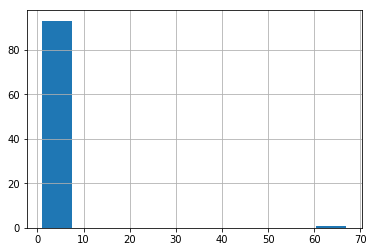

In [14]:
df_batch_1.cleaned_geo.value_counts().hist()

In [19]:
df_batch_1.cleaned_name.value_counts().head()

hramy_kg2       3
ashgAltha7ka    3
cocogeorge83    2
Sweetmayouya    2
gana_atwa       2
Name: cleaned_name, dtype: int64

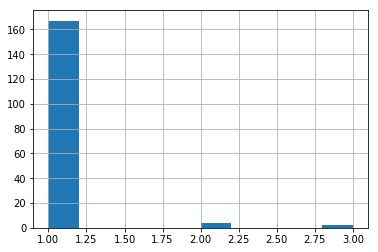

In [7]:
df_batch_1.cleaned_name.value_counts().hist()

In [20]:
df_batch_1.cleaned_geo.unique()

array(['None', 'Egypt↩Dubai', 'Egypt', 'بولندا', 'الاسكندرية', 'Cairo',
       'الأسكندرية, مصر', 'Tanta Egypt', 'El Monofia, Egypt',
       'Cairo , Egypt', 'Ciudad Real, Spain', 'Mansoura', 'Saudi Arabia',
       'الدمام', 'Germany', 'اخر الدنيا', 'في ارض الله الواسعه',
       'mansoura . egypt', 'فى اللانهائية وما بعدها',
       'El Monofia, Egypt shebin Elkom', 'Jordan Ksa .', 'قرية الجية',
       'Gaza, Palestine', 'هناك في السلام الداخلي', 'zagazig', 'السعودية',
       'خـيالگـو المـريـض !', 'Tokyo.London', 'طنطا', 'Tanta, Egypt',
       'Cairo -Egypt', 'السعودية - جدة', 'mansoura', 'Alexandria',
       'underground', 'El Daqahlia, Egypt', 'Q8', 'baghdad - iraq',
       'الاسكندريه دائما وابدآ', 'مصر ام الدنيا', 'يلا مش مہم',
       'يوم ف السويس و في المقطم', 'S A U D I A R A B I A',
       'صلالة / أرض الأصالة واللبان', '🇸🇦️', 'Jeddah / KSA',
       'mahmoudbenkamal.Sarahah.com', 'القلعة', 'بنى سويف, مصر',
       'في بيتنا', 'Tanta', 'فوق السوبر ماركت', 'السويس, مصر', '',
     

In [21]:
df_batch_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 632
Data columns (total 3 columns):
cleaned_text    330 non-null object
cleaned_name    330 non-null object
cleaned_geo     330 non-null object
dtypes: object(3)
memory usage: 10.3+ KB


In [22]:
df_batch_1.cleaned_name.nunique()

310

__Finding users with highest lexical diversity scores to add them to timelines search__

In [23]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [24]:
#creating cleaned text score in a new column
df_batch_1['cleaned_text_score'] = df_batch_1['cleaned_text'].map(lambda x: lexical_diversity(x))

In [25]:
#creating length of cleaned text in a new column to remove short tweets w/high lexical diversity score
df_batch_1['cleaned_text_len'] = df_batch_1['cleaned_text'].map(lambda x: len(x))

In [26]:
#creating mask of tweets w/ lexical diversity scores over 0.4
df_highest_user_scores = df_batch_1.loc[df_batch_1['cleaned_text_score'] >= 0.4, 
                                        ['cleaned_name','cleaned_text_score', 'cleaned_text', 'cleaned_text_len']]

In [27]:
#adding mask to exclude tweets under 40 characters
df_highest_user_scores[(df_highest_user_scores['cleaned_text_score'] >= 0.40) 
                         & (df_highest_user_scores['cleaned_text_len'] >= 40)].head(10)

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
7,Hazem__Azim,0.448980,ازيك يا محمد .. قلقتني عليك بشدة .. اختفائك .. ؟!,49
8,mzeezm131,0.450980,: ازيك يا محمد .. قلقتني عليك بشدة .. اختفائك .. ؟!,51
29,Ibrahim1991116,0.400000,ازيك انتى بتعلمينى الصبر على البلاء افتكرى ده,45
49,rara_albitar,0.511628,مره رز سلم على مديره قاله ازيك يا Rice 🤦‍️.,43
50,mhmdthammad97,0.511111,: مره رز سلم على مديره قاله ازيك يا Rice 🤦‍️.,45
54,Ayaatttt,0.425000,صباح السكر . ازيك ياحسين كل سنه وانت طيب,40
91,mariammarmar22,0.404255,: فى لحظه بحس كلمه ازيك ليا ليها كل معانى العشق,47
94,alharby1133,0.425532,أشده من قفاه واقوله ازيك الجراءة حلوة مفيش كلام,47
133,fJuve3,0.460000,ازيك يابو مكة ماتعيطش مش حنضرب جامد -٠ عليكم كفاية,50
145,ahmed_elghoull,0.452830,- ازيك فاكرني ؟ - اه طبعآ وهيا الأشكال الوسخة تتنسي !,53


In [28]:
df_highest_user_scores.sort_values('cleaned_text_score', ascending=False).head()

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
63,Nody183,1.0,ازيك |,6
374,jL6lSOIru47CE,1.0,طب ازيك,7
95,badr_1388,1.0,: …,3
600,shadymohsen389,1.0,هشخر,4
194,nourai208,1.0,: ازيك,6


### Conduct EDA on tweets

In [29]:
word_list = [word for line in df_batch_1['cleaned_text'] for word in line.split()]

In [31]:
word_list[:5]

['ازيك', 'صباح', 'الفل', 'اللهم', 'آمين']

In [32]:
word_list.count('مغسلة')

0

In [33]:
len(word_list)

2977

In [34]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

1312

In [37]:
from nltk.text import Text  

In [39]:
text_eda = Text(word_list)

In [38]:
def percentage(count, total):
    return 100 * count / total

In [40]:
percentage(text_eda.count('مغسلة'), len(text_eda))

0.0

In [41]:
text_eda.concordance("مغسلة")

No matches


In [42]:
from nltk import FreqDist

In [43]:
fdist1 = FreqDist(text_eda)

In [44]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:10]

['ازيك', 'صباح', 'الفل', 'اللهم', 'آمين', '..', 'يارب', 'تكون', 'في', 'احسن']

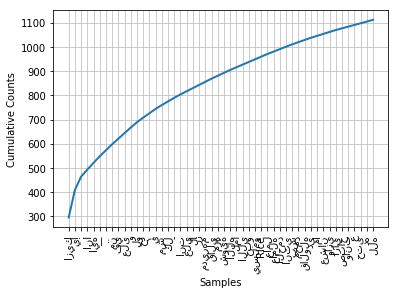

In [45]:
fdist1.plot(50, cumulative=True)

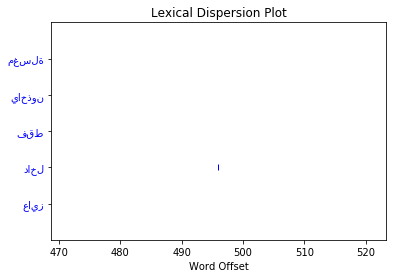

In [46]:
text_eda.dispersion_plot([u"مغسلة", "ياخذون", "فقط", "داخل", "عايز"])

In [47]:
text_eda.similar("مغسلة")

No matches


In [48]:
sorted([w for w in set(word_list) if len(w) > 2 and fdist1[w] > 10])

['Rice',
 'ازيك',
 'الله',
 'اللي',
 'انا',
 'انت',
 'ايه',
 'حبو',
 'شوية',
 'عامل',
 'على',
 'علي',
 'قالي',
 'لما',
 'مديرهم',
 'مرة',
 'يسلمو']

In [49]:
word_length = [len(w) for w in text_eda]

In [50]:
word_length[:10]

[4, 4, 4, 5, 4, 2, 4, 2, 4, 4]

In [51]:
fdist = FreqDist([len(w) for w in text_eda])

In [52]:
print(fdist)

<FreqDist with 14 samples and 2977 outcomes>


In [53]:
fdist.items()

dict_items([(4, 943), (5, 409), (2, 429), (3, 445), (1, 219), (6, 293), (8, 67), (7, 133), (10, 7), (9, 23), (12, 5), (11, 2), (22, 1), (13, 1)])

In [54]:
fdist.max()

4

In [55]:
fdist.freq(2)

0.14410480349344978